# Predicting German Credit Default
## K-Means 

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.cluster import KMeans

## Primer proceso de datos

In [2]:
df = pd.read_csv('../Datasets/scored_data_bin.csv',index_col=0)
df

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
unnamed:_0,,,,,,,,,,
0,67,1,2,1,2,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,2,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,2,1736,12,4,1
996,40,1,3,1,0,0,3857,30,1,1
997,38,1,2,1,0,2,804,12,5,1


In [3]:
k_means = KMeans(n_clusters=2, max_iter=10000)

In [4]:
X = df.drop(columns=['risk'])

In [5]:
k_means.fit(X)

KMeans(max_iter=10000, n_clusters=2)

In [6]:
Y_test = df['risk']
Y_pred = k_means.predict(X)

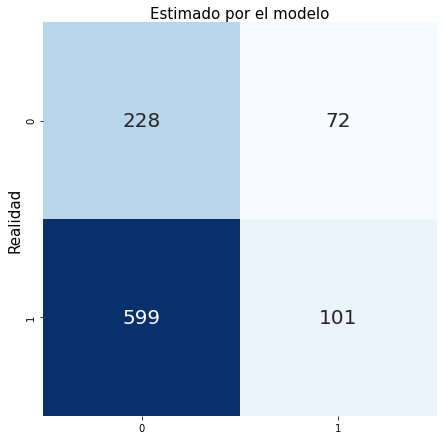

In [7]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [9]:
tn, fp, fn, tp = cnf_matrix.ravel()

pre = round((metrics.precision_score(Y_test, Y_pred) * 100), 2)
exa = round((metrics.accuracy_score(Y_test, Y_pred) * 100), 2)
sen = round((metrics.recall_score(Y_test, Y_pred) * 100), 2)
esp = round((tn / (tn + fp) * 100), 2)

print(f'Precision: {pre}%')
print(f'Exactitud: {exa}%')
print(f'Sensibilidad: {sen}%')
print(f'Especificidad: {esp}&' )

Precision: 58.38%
Exactitud: 32.9%
Sensibilidad: 14.43%
Especificidad: 76.0&


## Segundo proceso de datos

In [10]:
df = pd.read_csv('../Datasets/scored_data_all_bin.csv',index_col=0)
df

,sex,risk,age_Estudiante,age_Joven Adulto,age_Adulto,age_Mayor edad,duration_1 año,duration_2 años,duration_3 años,duration_4 años,...,checking_account_no_info,checking_account_rich,purpose_business,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
unnamed:_0,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
996,1,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
997,1,1,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [11]:
k_means = KMeans(n_clusters=2, max_iter=500)
X = df.drop(columns=['risk'])
k_means.fit(X)

KMeans(max_iter=500, n_clusters=2)

In [12]:
Y_test = df['risk']
Y_pred = k_means.predict(X)

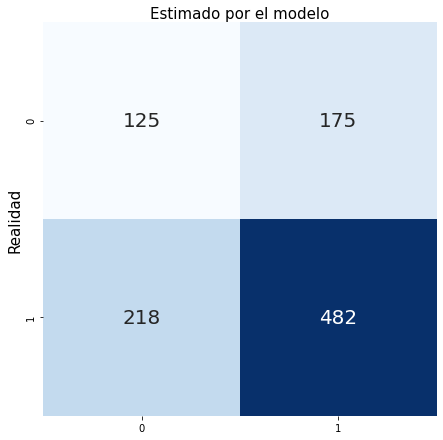

In [13]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [14]:
tn, fp, fn, tp = cnf_matrix.ravel()

pre = round((metrics.precision_score(Y_test, Y_pred) * 100), 2)
exa = round((metrics.accuracy_score(Y_test, Y_pred) * 100), 2)
sen = round((metrics.recall_score(Y_test, Y_pred) * 100), 2)
esp = round((tn / (tn + fp) * 100), 2)

print(f'Precision: {pre}%')
print(f'Exactitud: {exa}%')
print(f'Sensibilidad: {sen}%')
print(f'Especificidad: {esp}&' )

Precision: 73.36%
Exactitud: 60.7%
Sensibilidad: 68.86%
Especificidad: 41.67&
